# Dimension Reduction Application and Comparison between PCA and LDA in Iris Dataset

## Principal Component Analysis (PCA)
One of the model for dimension reduction is PCA. We will visualize the non-PCA and PCA simple data below.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [27]:
rand_num = np.random.RandomState(42)
X = np.dot(rand_num.rand(2,2), rand_num.rand(2,500)).T

In [28]:
X[:5]

array([[0.70941896, 0.52412483],
       [0.21302846, 0.21153905],
       [0.88778615, 0.58785114],
       [1.10641564, 1.12645459],
       [1.12813005, 1.00861832]])

Lets visualize the data.

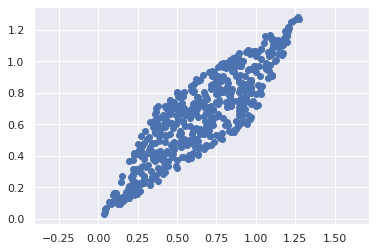

In [29]:
sns.set()
plt.scatter(X[:,0], X[:,1])
plt.axis('equal')
plt.show()

Now we will fit the Data with PCA and later we will visualize the data with PCA and non-PCA

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [31]:
print(pca.components_)
print(pca.explained_variance_)


[[ 0.72953501  0.68394347]
 [ 0.68394347 -0.72953501]]
[0.15411534 0.01050188]


We will visualize the eigen vector of PCA below.

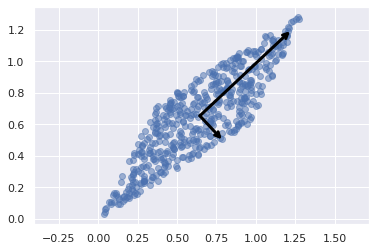

In [32]:
plt.scatter(X[:,0], X[:,1], alpha = 0.5)

for k, v in zip(pca.explained_variance_, pca.components_):
  vec = v*2*np.sqrt(k)

  ax = plt.gca()
  arrowprops = dict(arrowstyle='<-', linewidth=3,
                    shrinkA=0, shrinkB=0, color='black')
  ax.annotate('', pca.mean_, pca.mean_ + vec, arrowprops = arrowprops)
plt.axis('equal')
plt.show()

In [33]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
X_new = pca.inverse_transform(X_pca)

Now we will visualize the PCA and non-PCA Data, with this you can see what happening with data that has been transformed with PCA

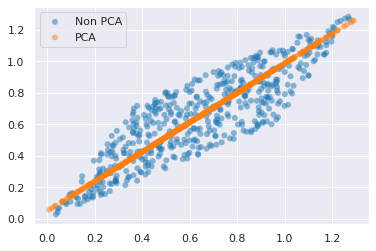

In [34]:
data = [X, X_new]
color = ['tab:blue', 'tab:orange']
label = ['Non PCA', 'PCA']
fig, ax = plt.subplots()
for x, c, label in zip(data, color, label):
    ax.scatter(x[:,0], x[:,1], c=c, label=label,
               alpha=0.5, edgecolors='none')

ax.legend()
ax.grid(True)

plt.show()

Lets look at PCA with another Data. We will import Project Wine Data

In [35]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

--2022-01-13 07:33:47--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10782 (11K) [application/x-httpd-php]
Saving to: ‘wine.data’

wine.data           100%[===================>]  10.53K  --.-KB/s    in 0s      

2022-01-13 07:33:47 (56.1 MB/s) - ‘wine.data’ saved [10782/10782]



In [37]:
df = pd.read_csv('/content/wine.data')
df.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [38]:
df.shape

(177, 14)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       177 non-null    int64  
 1   14.23   177 non-null    float64
 2   1.71    177 non-null    float64
 3   2.43    177 non-null    float64
 4   15.6    177 non-null    float64
 5   127     177 non-null    int64  
 6   2.8     177 non-null    float64
 7   3.06    177 non-null    float64
 8   .28     177 non-null    float64
 9   2.29    177 non-null    float64
 10  5.64    177 non-null    float64
 11  1.04    177 non-null    float64
 12  3.92    177 non-null    float64
 13  1065    177 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [40]:
col_name = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
            'Total phenols', 'Flavanoids', 'Nonfalavanoids phenols', 'Proanthocyaniins',
            'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

In [41]:
df.columns = col_name

In [48]:
X = df.drop(columns=['Class']) 

In [49]:
y = df['Class']

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [52]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
X_train_s = s.fit_transform(X_train)
X_test_s = s.transform(X_test)

In [53]:
pca = PCA(n_components=2)
pca.fit(X_train_s)

PCA(n_components=2)

In [56]:
pca.explained_variance_ratio_

array([0.35670622, 0.19468297])

In [57]:
pca = PCA(n_components=None)
pca.fit(X_train_s)

PCA()

In [58]:
pca.transform(X_train_s)

array([[ 3.39770684,  1.19458043,  1.57092996, ...,  1.08392754,
        -0.19272624, -0.22782093],
       [ 3.92135308,  0.49466892,  1.73659213, ...,  0.53374801,
        -0.23374373, -0.14208485],
       [-1.59171678, -1.89712336,  0.94212442, ...,  0.09635705,
        -0.18294503,  0.12117988],
       ...,
       [-2.28100579,  1.79911308,  0.03296037, ...,  0.39151638,
         0.48036603, -0.06017898],
       [-0.92880663, -2.21416587,  0.3027374 , ..., -0.4367813 ,
         0.29286954, -0.37632963],
       [ 0.47771285, -2.66552669, -0.63687218, ...,  0.40444126,
        -0.60343699, -0.18218483]])

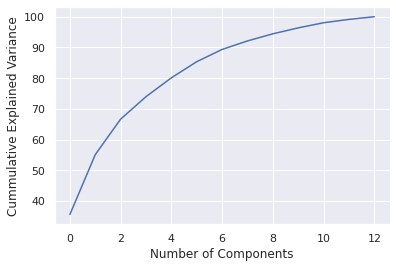

In [59]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel('Number of Components')
plt.ylabel('Cummulative Explained Variance')
plt.show()

With the visualization above you can see that you nned 4 components to have 80% explained components. For more info you can search about cummulative explained variance.

But the example data above is a linear model. We will need another method for non linear mode.

## Kernel PCA

In [60]:
from sklearn.datasets import make_circles
from sklearn.decomposition import PCA, KernelPCA

In [61]:
np.random.seed(42)
X, y = make_circles(n_samples=400, factor=0.3, noise=0.1)

In [62]:
kpca = KernelPCA(kernel='rbf', fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)

pca = PCA()
X_pca = pca.fit_transform(X)

We will visualize the real data

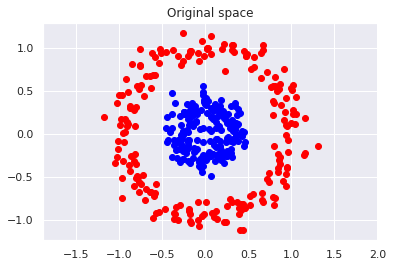

In [67]:
plt.figure()
plt.title('Original space')
red = y == 0
blue = y == 1

plt.scatter(X[red,0], X[red,1], c='red')
plt.scatter(X[blue,0], X[blue,1], c='blue')
plt.axis('equal')
plt.show()

Now we will visualize the data that has been transformed using PCA

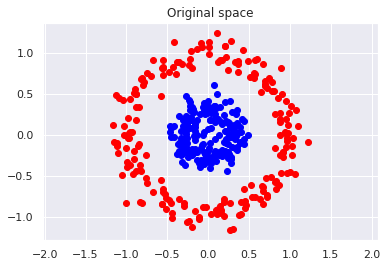

In [68]:
plt.figure()
plt.title('Original space')
red = y == 0
blue = y == 1

plt.scatter(X_pca[red,0], X_pca[red,1], c='red')
plt.scatter(X_pca[blue,0], X_pca[blue,1], c='blue')
plt.axis('equal')
plt.show()

And the image below is the data that has been transformed by KernelPCA

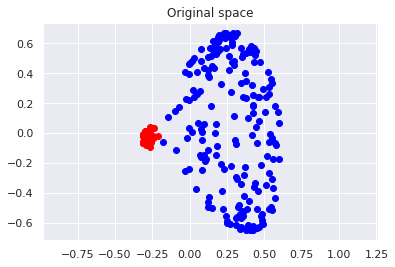

In [69]:
plt.figure()
plt.title('Original space')
red = y == 0
blue = y == 1

plt.scatter(X_kpca[red,0], X_kpca[red,1], c='red')
plt.scatter(X_kpca[blue,0], X_kpca[blue,1], c='blue')
plt.axis('equal')
plt.show()

Lets look into Kernel PCA with Iris Data and see the comparison

In [70]:
df = sns.load_dataset('iris')
df = df[df['species'] != 'setosa']

In [71]:
X = df[['petal_length', 'petal_width']]
to_num = {'versicolor' : 0, 'virginica' : 1}
df['tmp'] = df['species'].map(to_num)

In [72]:
y = df['tmp']

In [73]:
kpca = KernelPCA(kernel='rbf', n_components=2)
X_kpca = kpca.fit_transform(X)

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
clf = LogisticRegression(solver='lbfgs')
clf.fit(X,y)

LogisticRegression()

We visualize the data separation without PCA

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


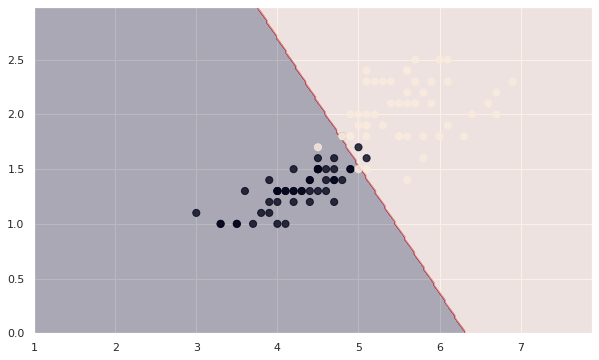

In [79]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize = (10,6))
ax = plt.contourf(xx, yy, z, alpha = 0.3)
plt.scatter(X['petal_length'], X['petal_width'], c = y, s = 50, alpha = 0.8)
plt.show()

In [80]:
clf.fit(X_kpca,y)

LogisticRegression()

We visualize the data separation that has been transformed using Kernel PCA

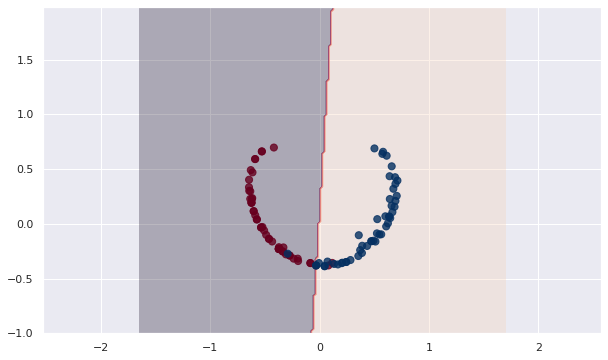

In [90]:
Xv = X_kpca.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min()-1, Xv.max() + 1
y_min, y_max = y.min()-1, y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize = (10,6))
ax = plt.contourf(xx, yy, z, alpha = 0.3)
plt.scatter(X_kpca[:,0], X_kpca[:,1], c = y, s = 50, alpha = 0.8, cmap='RdBu')
plt.axis('equal')
plt.show()

## Linear Discriminat Analysis (LDA)

In [91]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [92]:
clf = LinearDiscriminantAnalysis()
clf.fit(X, y)

LinearDiscriminantAnalysis()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  "X does not have valid feature names, but"


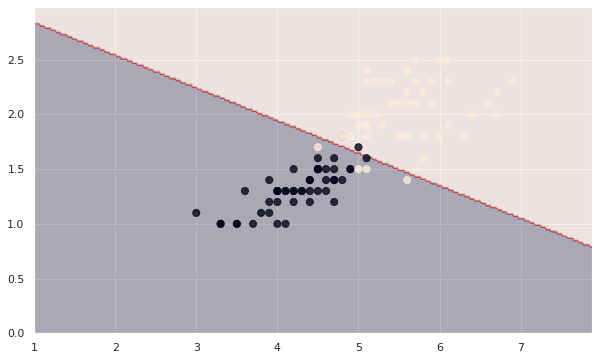

In [93]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize = (10,6))
ax = plt.contourf(xx, yy, z, alpha = 0.3)
plt.scatter(X['petal_length'], X['petal_width'], c = y, s = 50, alpha = 0.8)
plt.show()

In [95]:
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

Every data need different model. For iris data, we can see the comparison below. With LDA, the separation between each target is more visible than PCA. For this iris data model, LDA perform better than PCA.

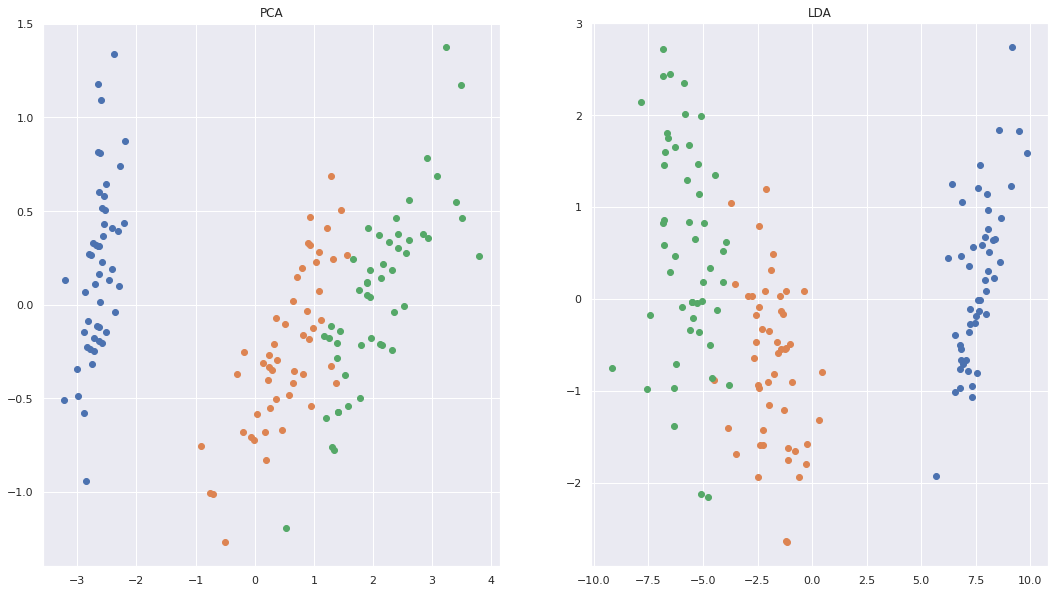

In [103]:
fig = plt.figure(figsize=(18,10))

plt.subplot(1, 2, 1)
for i in [0,1,2]:
  plt.scatter(X_pca[y == i,0], X_pca[y == i,1], label=target_names)
plt.title('PCA')

plt.subplot(1, 2, 2)
for i in [0,1,2]:
  plt.scatter(X_lda[y == i,0], X_lda[y == i,1], label=target_names)
plt.title('LDA')

plt.show()